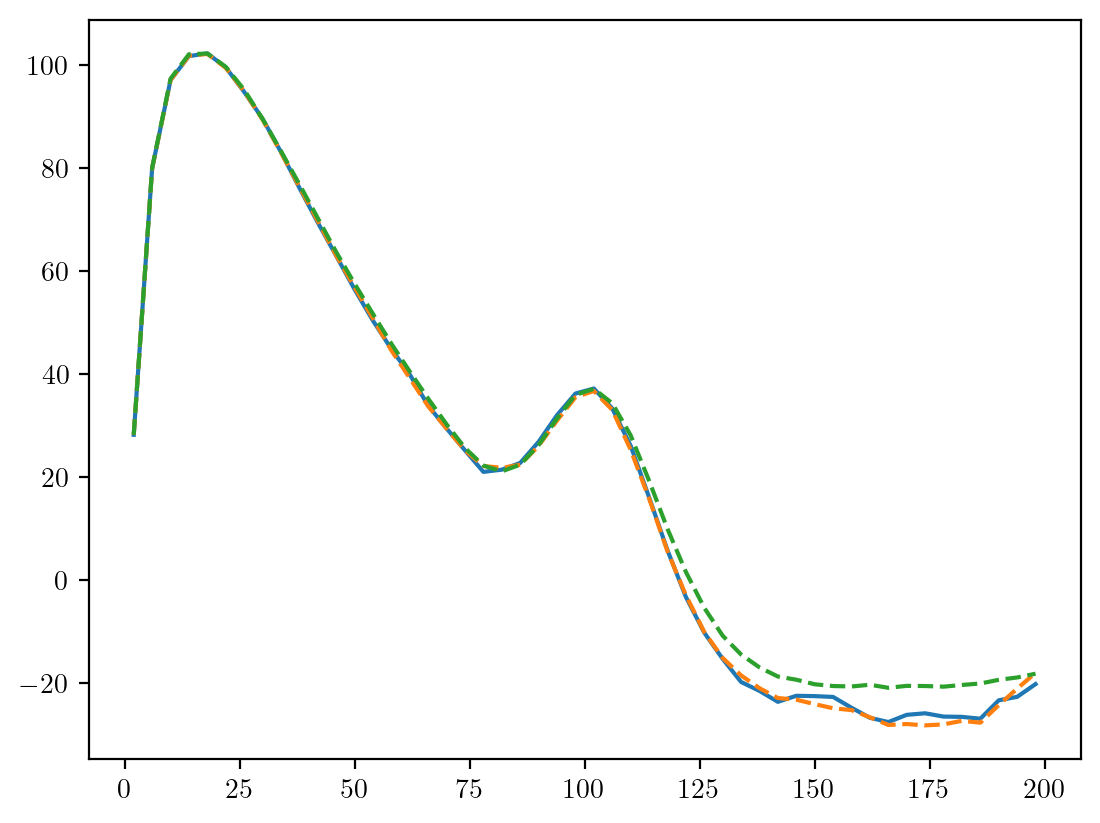

In [101]:
from sklearn.decomposition import PCA
from pycorr import TwoPointCorrelationFunction
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def get_pca_projection(data, npca=3):
    pca = PCA(n_components=nca, svd_solver='full')
    pca_data = pca.fit_transform(data - data.mean(axis=0))
    pca_data = pca.inverse_transform(pca_data) + data.mean(axis=0)
    return pca_data


def read_multipoles(hod_idx, phase_idx=0, seed_idx=0):
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/z0.5/yuan23_prior/c000_ph{phase_idx:03}/seed{seed_idx}/'
    data_fn = Path(data_dir) / f'tpcf_hod{hod_idx:03}.npy'
    data = TwoPointCorrelationFunction.load(data_fn)[::4]
    s, multipoles = data(ells=(0, 2, 4), return_sep=True)
    return s, multipoles


multipoles = []

for phase_idx in range(0, 25):
    s, poles = read_multipoles(hod_idx=466, phase_idx=phase_idx, seed_idx=0)
    multipoles.append(poles[0])
    
multipoles = np.array(multipoles)
multipoles_mean = multipoles.mean(axis=0)

pca = PCA(n_components=10, svd_solver='full')
pca_multipoles = pca.fit_transform(multipoles - multipoles_mean)
pca_multipoles = pca.inverse_transform(pca_multipoles) + multipoles_mean


fig, ax = plt.subplots()

phase_idx = 6

ax.plot(s, s**2*multipoles[phase_idx])
ax.plot(s, s**2*pca_multipoles[phase_idx], ls='--')
ax.plot(s, s**2*multipoles_mean, ls='--')
# # ax.plot(s, s**2*(multipoles_mean + pca.components_[0]))
plt.show()

(25, 50)


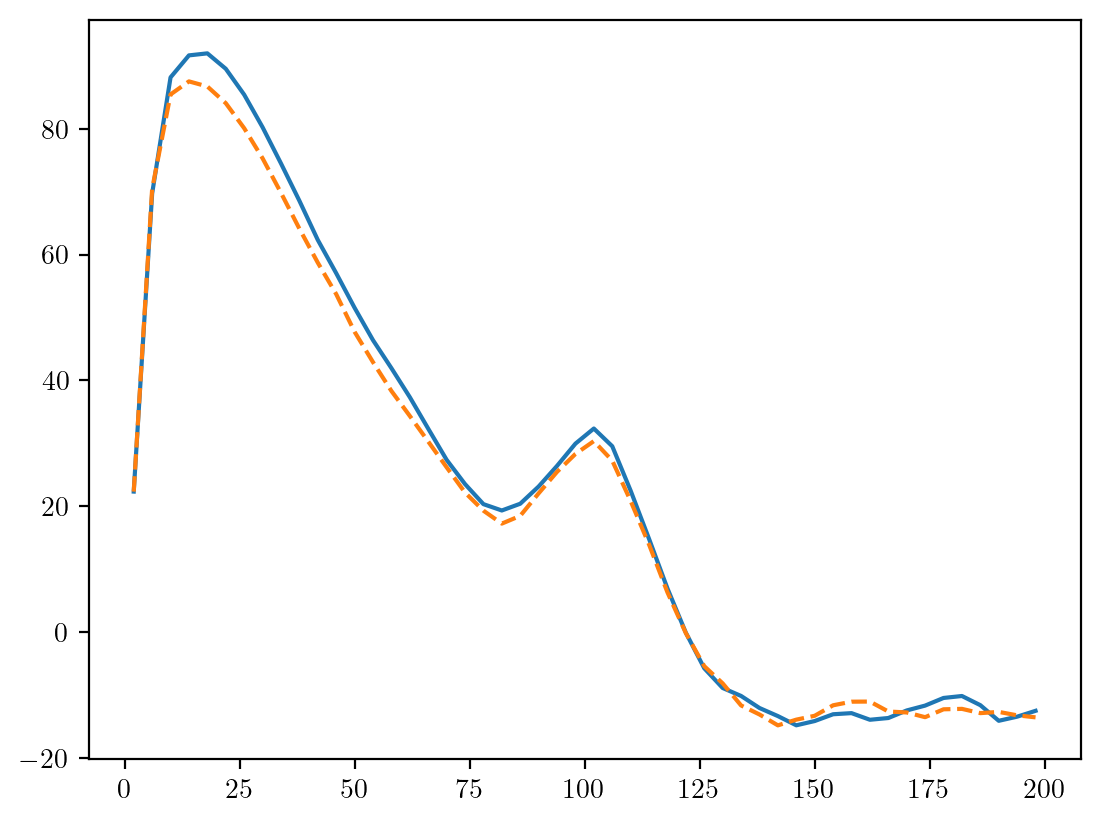

In [79]:
from sklearn.decomposition import PCA
from pycorr import TwoPointCorrelationFunction
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


def read_multipoles(hod_idx, phase_idx=0, seed_idx=0):
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/z0.5/yuan23_prior/c000_ph{phase_idx:03}/seed{seed_idx}/'
    data_fn = Path(data_dir) / f'tpcf_hod{hod_idx:03}.npy'
    data = TwoPointCorrelationFunction.load(data_fn)[::4]
    s, multipoles = data(ells=(0, 2, 4), return_sep=True)
    return s, multipoles

multipoles = []

for hod_idx in range(0, 25):
    s, poles = read_multipoles(hod_idx=hod_idx, phase_idx=0, seed_idx=0)
    multipoles.append(poles[0])
    
multipoles = np.array(multipoles)
multipoles_mean = multipoles.mean(axis=0)

pca = PCA(n_components=2, svd_solver='full')
pca_multipoles = pca.fit_transform(multipoles - multipoles_mean)
pca_multipoles = pca.inverse_transform(pca_multipoles) + multipoles_mean


print(pca_multipoles.shape)

fig, ax = plt.subplots()

ax.plot(s, s**2*multipoles[4])
ax.plot(s, s**2*pca_multipoles[4], ls='--')
# # ax.plot(s, s**2*(multipoles_mean + pca.components_[0]))
plt.show()